#imports and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import pairwise_distances_chunked
from scipy.spatial.distance import cosine

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:600,:]
y_sub = train_labels[:600]

#Full data set

In [ ]:
#euclid
"""
euclid_acc=[]
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    euclid_acc.append(score)
    print('K:',k,'\n Accuracy:', score)

#city-block
man_acc=[] #Manhattan dist
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score = accuracy_score(y_true=test_labels, y_pred=y_preds)
    man_acc.append(score)
    print('K:',k,'\n Accuracy:', score)
"""



In [ ]:
cos_acc=[]
for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    model.fit(X_train, train_labels)
    y_preds = model.predict(X_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    cos_acc.append(accuracy_score(y_true=test_labels, y_pred=y_preds))
    print('K:',k,'\n Accuracy:', score)


K: 1 
 Accuracy: 0.8576
K: 2 
 Accuracy: 0.8541
K: 3 
 Accuracy: 0.8564
K: 4 
 Accuracy: 0.859
K: 5 
 Accuracy: 0.8578
K: 6 
 Accuracy: 0.858
K: 7 
 Accuracy: 0.8559
K: 8 
 Accuracy: 0.8542
K: 9 
 Accuracy: 0.8516
K: 10 
 Accuracy: 0.8529
K: 11 
 Accuracy: 0.8483
K: 12 
 Accuracy: 0.8504


Text(0, 0.5, 'Percent Error')

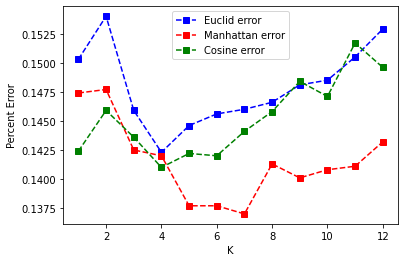

In [4]:
euclid_acc=[0.8497, 0.846, 0.8541, 0.8577, 0.8554, 0.8544,
            0.854, 0.8534, 0.8519, 0.8515, 0.8495, 0.8471]

man_acc=[0.8526, 0.8523, 0.8575, 0.858, 0.8623, 0.8623, 
          0.863, 0.8587, 0.8599, 0.8592, 0.8589, 0.8568]

cos_acc=[0.8576,0.8541,0.8564,0.859,0.8578,0.858,
         0.8559,0.8542,0.8516,0.8529,0.8483,0.8504]

euclid_error = 1-np.array(euclid_acc)
man_error = 1-np.array(man_acc)
cos_error = 1-np.array(cos_acc)

plt.plot(range(1,13), euclid_error, '--bs', label='Euclid error')
plt.plot(range(1,13), man_error,'--rs', label = 'Manhattan error')
plt.plot(range(1,13), cos_error,'--gs', label = 'Cosine error')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')